## Assignment 1: Machine Learning Methods

### \<Zuxing> \<a1816653>

#### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad). 
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight (use your magical Google skills to find the formula).

The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

#### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)
- Obesity level as a factor with levels (NObeyesdad)

### 1. Read the dataset

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [228]:
df = pd.read_csv('ObesityDataSet.csv')

# get a general overview
df.head(15)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC   
0   Female  21.0    1.62    64.0                            yes   no   2.0  \
1   Female  21.0    1.52    56.0                            yes   no   3.0   
2     Male  23.0    1.80    77.0                            yes   no   2.0   
3     Male  27.0    1.80    87.0                             no   no   3.0   
4     Male  22.0    1.78    89.8                             no   no   2.0   
5     Male  29.0    1.62    53.0                             no  yes   2.0   
6   Female  23.0    1.50    55.0                            yes  yes   3.0   
7     Male  22.0    1.64    53.0                             no   no   2.0   
8     Male  24.0    1.78    64.0                            yes  yes   3.0   
9     Male  22.0    1.72    68.0                            yes  yes   2.0   
10    Male  26.0    1.85   105.0                            yes  yes   3.0   
11  Female  21.0    1.72    80.0                            yes  yes   2.0   
12    Male  22.0    1.65    56.0                             no   no   3.0   
13    Male  41.0    1.80    99.0                             no  yes   2.0   
14    Male  23.0    1.77    60.0                            yes  yes   3.0   

    NCP        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC   
0   3.0   Sometimes    no   2.0   no  0.0  1.0          no  \
1   3.0   Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2   3.0   Sometimes    no   2.0   no  2.0  1.0  Frequently   
3   3.0   Sometimes    no   2.0   no  2.0  0.0  Frequently   
4   1.0   Sometimes    no   2.0   no  0.0  0.0   Sometimes   
5   3.0   Sometimes    no   2.0   no  0.0  0.0   Sometimes   
6   3.0   Sometimes    no   2.0   no  1.0  0.0   Sometimes   
7   3.0   Sometimes    no   2.0   no  3.0  0.0   Sometimes   
8   3.0   Sometimes    no   2.0   no  1.0  1.0  Frequently   
9   3.0   Sometimes    no   2.0   no  1.0  1.0          no   
10  3.0  Frequently    no   3.0   no  2.0  2.0   Sometimes   
11  3.0  Frequently    no   2.0  yes  2.0  1.0   Sometimes   
12  3.0   Sometimes    no   3.0   no  2.0  0.0   Sometimes   
13  3.0   Sometimes    no   2.0   no  2.0  1.0  Frequently   
14  1.0   Sometimes    no   1.0   no  1.0  1.0   Sometimes   

                   MTRANS           NObeyesdad  
0   Public_Transportation        Normal_Weight  
1   Public_Transportation        Normal_Weight  
2   Public_Transportation        Normal_Weight  
3                 Walking   Overweight_Level_I  
4   Public_Transportation  Overweight_Level_II  
5              Automobile        Normal_Weight  
6               Motorbike        Normal_Weight  
7   Public_Transportation        Normal_Weight  
8   Public_Transportation        Normal_Weight  
9   Public_Transportation        Normal_Weight  
10  Public_Transportation       Obesity_Type_I  
11  Public_Transportation  Overweight_Level_II  
12  Public_Transportation        Normal_Weight  
13             Automobile       Obesity_Type_I  
14  Public_Transportation        Normal_Weight

In [229]:
df.shape
# 2111 rows

(2111, 17)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [231]:
col_catogorial = df.select_dtypes(include=['object']).columns
col_catogorial

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [232]:
col_numerical = df.select_dtypes(exclude=['object']).columns
col_numerical

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [233]:
np.unique(df['Gender'])

array(['Female', 'Male'], dtype=object)

In [234]:
np.unique(df['family_history_with_overweight'])

array(['no', 'yes'], dtype=object)

In [235]:
np.unique(df['FAVC'])

array(['no', 'yes'], dtype=object)

In [236]:
np.unique(df['CAEC'])

array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object)

In [237]:
np.unique(df['SMOKE'])

array(['no', 'yes'], dtype=object)

In [238]:
np.unique(df['SCC'])

array(['no', 'yes'], dtype=object)

In [239]:
np.unique(df['CALC'])

array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object)

In [240]:
np.unique(df['MTRANS'])

array(['Automobile', 'Bike', 'Motorbike', 'Public_Transportation',
       'Walking'], dtype=object)

In [241]:
np.unique(df['NObeyesdad'])

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

### 2. Analyse and visualise the data

In [242]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Zero null/empty/NaN values in every column, good.

In [243]:
# get general overview of catogorial values distribution
for var in col_catogorial:
    print(df[var].value_counts())
    print('--------------------------')

Gender
Male      1068
Female    1043
Name: count, dtype: int64
--------------------------
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
--------------------------
FAVC
yes    1866
no      245
Name: count, dtype: int64
--------------------------
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
--------------------------
SMOKE
no     2067
yes      44
Name: count, dtype: int64
--------------------------
SCC
no     2015
yes      96
Name: count, dtype: int64
--------------------------
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
--------------------------
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
--------------------------
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_

Let me see **NObeyesdad** distribution by visualisation

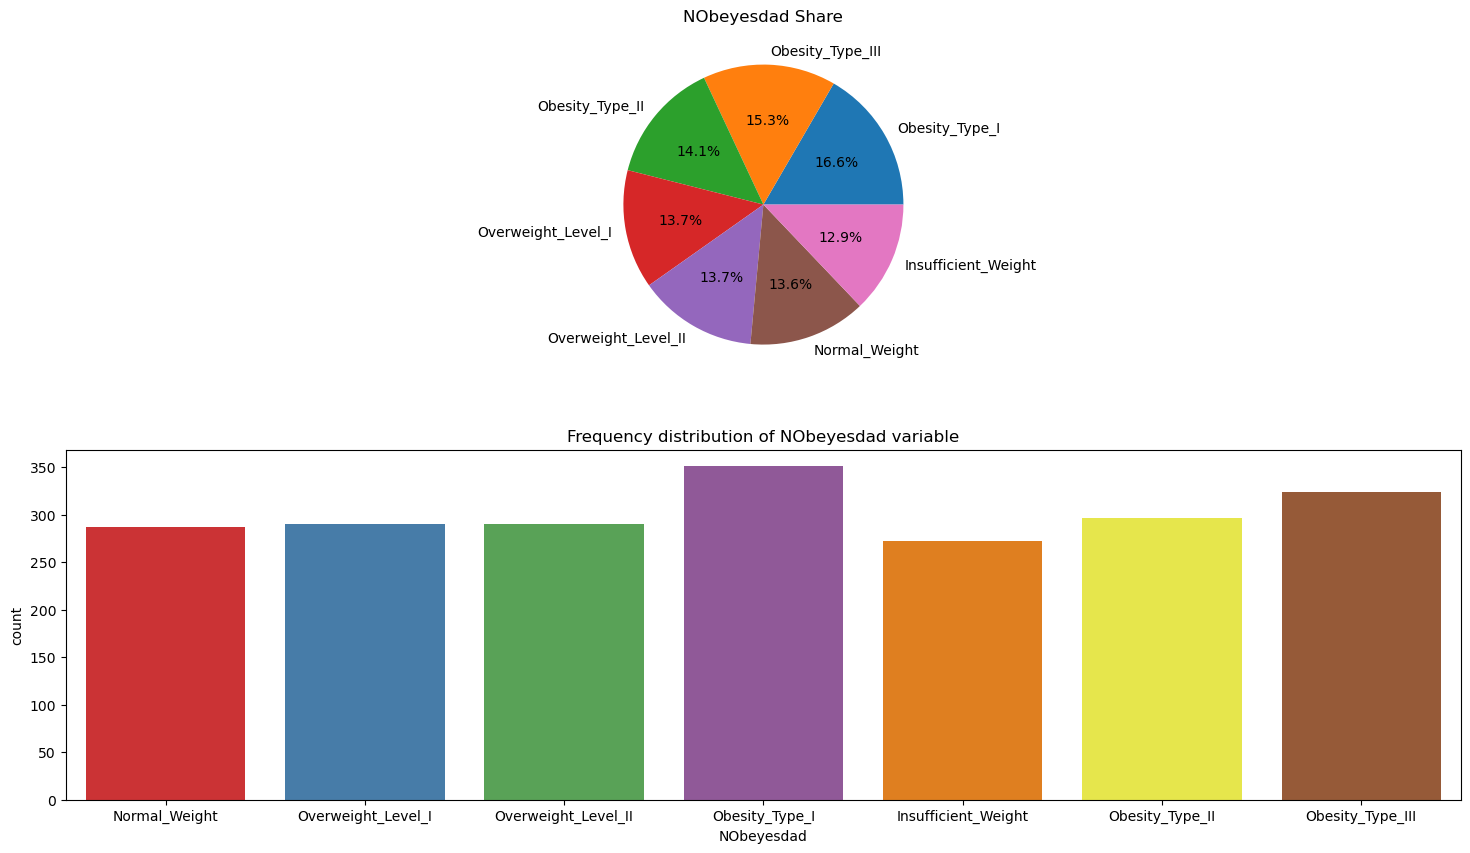

In [244]:
f, ax = plt.subplots(2, 1, figsize=(18, 10))

ax[0] = df['NObeyesdad'].value_counts().plot.pie(autopct='%1.1f%%', ax = ax[0], shadow=False)
ax[0].set_title('NObeyesdad Share')
ax[0].set_ylabel("")

ax[1] = sns.countplot(x="NObeyesdad", data=df, palette="Set1", hue="NObeyesdad", legend=False)
ax[1].set_title("Frequency distribution of NObeyesdad variable")

plt.show()

I am thinking whether I should combine 3 obesity types into one, and combine 2 overweight levels into one.

Next, I want to see the differences between female and male.

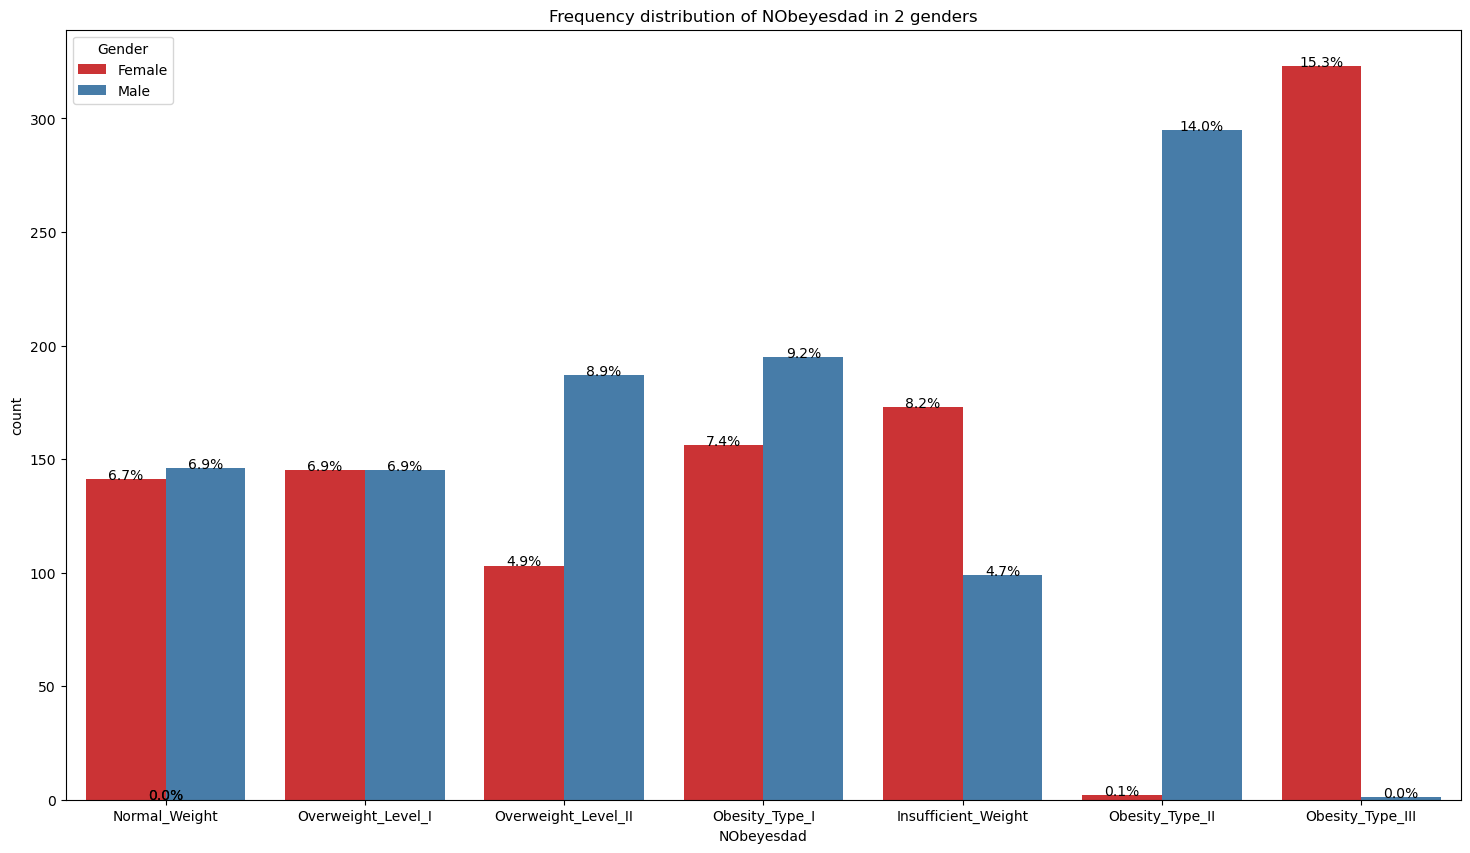

In [245]:
plt.figure(figsize=(18, 10))
total = float(len(df))
ax = sns.countplot(x='NObeyesdad', hue='Gender', data=df, palette='Set1')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Frequency distribution of NObeyesdad in 2 genders')
plt.show()

Based on common senses, Normal_Weight, Overweight_Level_1 look right.  
Insufficient_Weight also makes sense. (Women wants to keep slim.)  
Obesity_Type_1 doesn't show much difference. Good.  
**Overweight_Level_2** shows a 2 times difference.  
The last 2 types are unbelievable: **Obesity_Type_2**, **Obesity_Type_3**.

Next, let me see the effect of people's family_history_with_overweight.

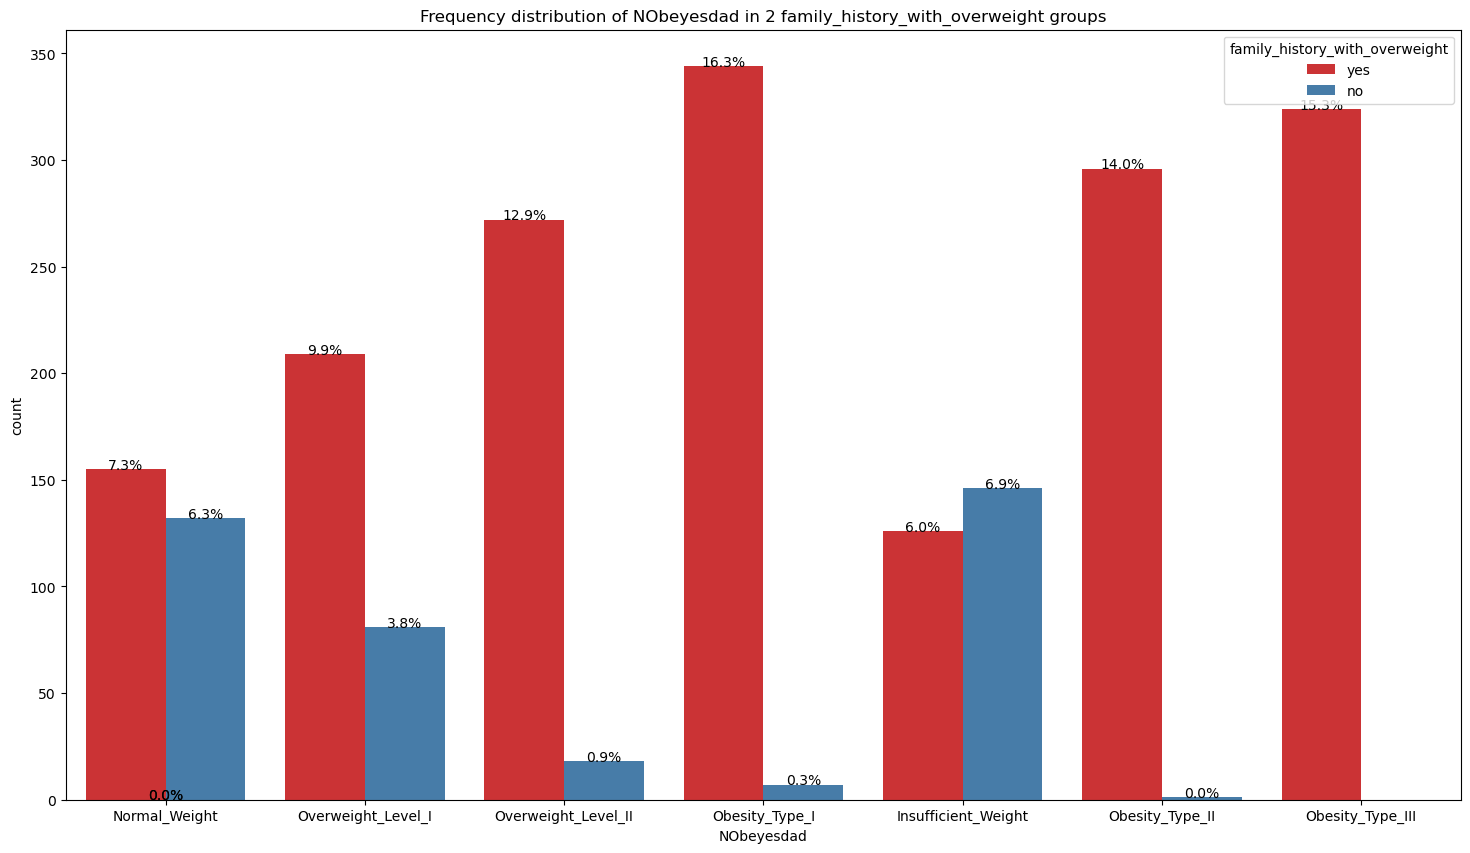

In [246]:
plt.figure(figsize=(18, 10))
total = float(len(df))
ax = sns.countplot(x='NObeyesdad', hue='family_history_with_overweight', data=df, palette='Set1')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Frequency distribution of NObeyesdad in 2 family_history_with_overweight groups')
plt.show()

**family_history_with_overweight** does affect offspring's health. Because of Genes!  

Next, **SMOKE**.

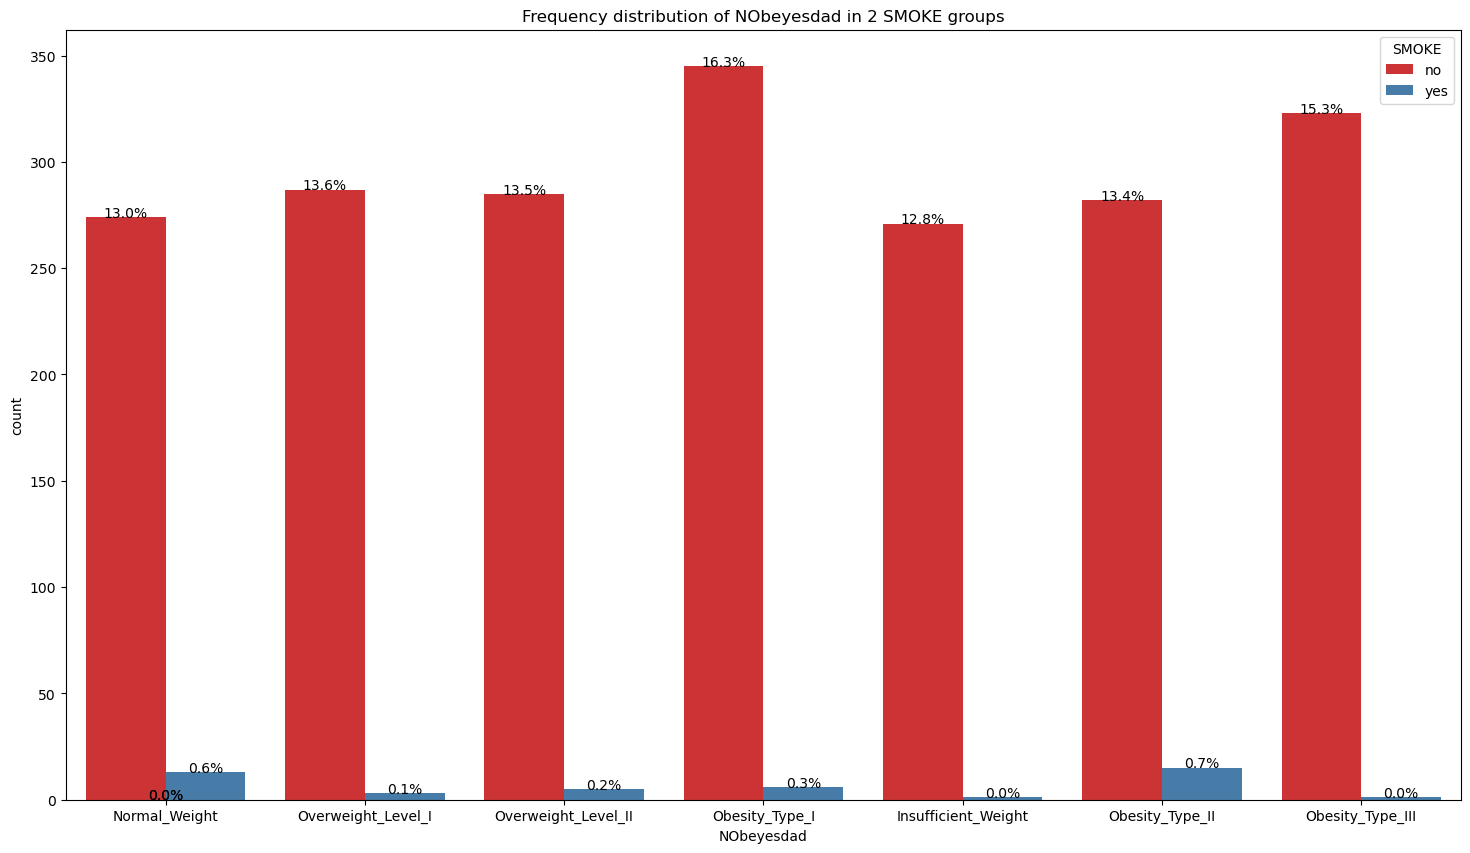

In [247]:
plt.figure(figsize=(18, 10))
total = float(len(df))
ax = sns.countplot(x='NObeyesdad', hue='SMOKE', data=df, palette='Set1')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Frequency distribution of NObeyesdad in 2 SMOKE groups')
plt.show()

Hmmm, **SMOKE** is not highly relevant.

Next, calories consumption monitoring (**SCC**)

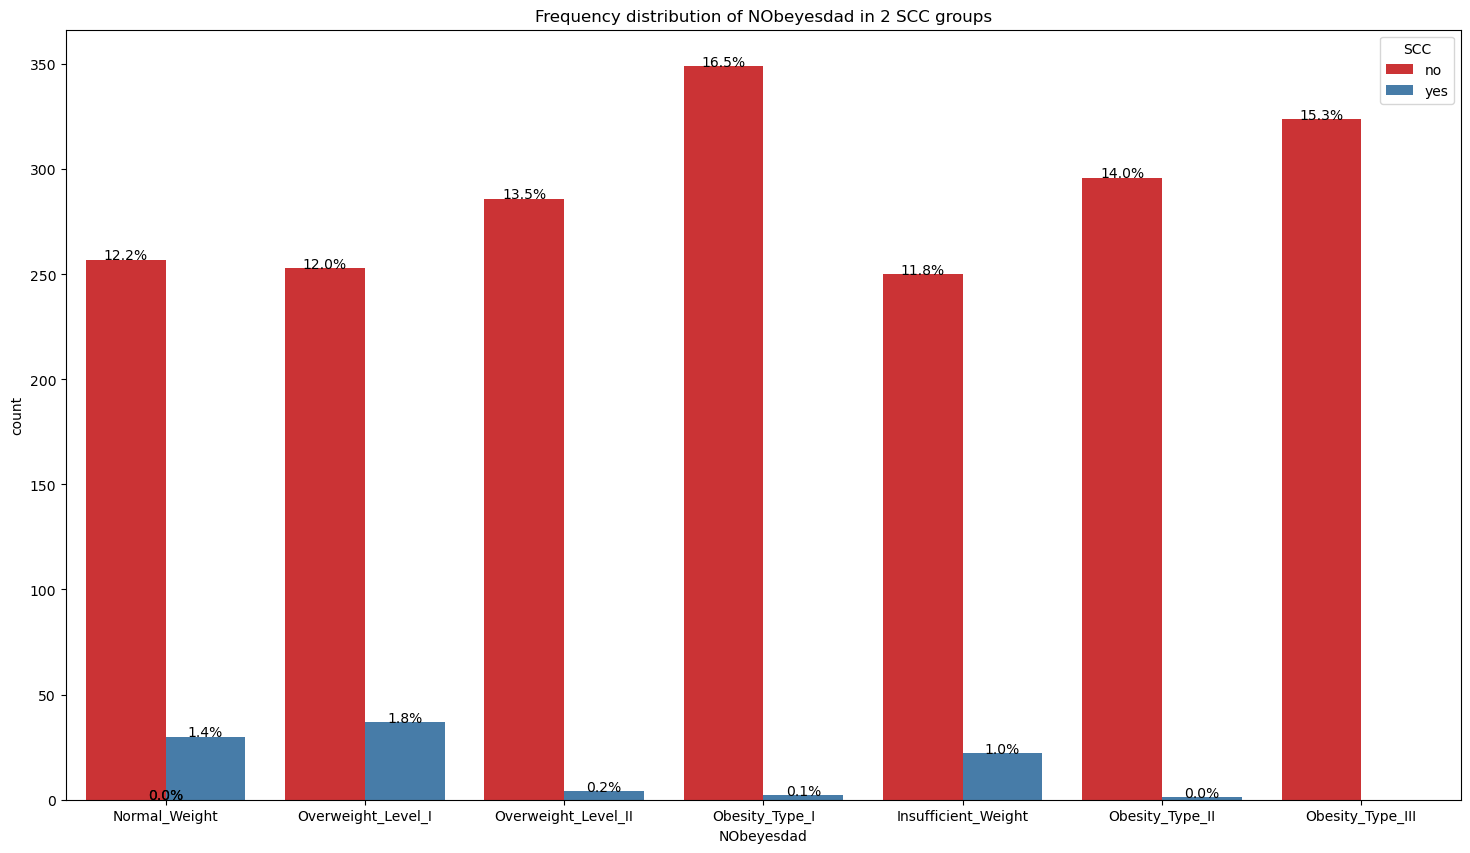

In [248]:
plt.figure(figsize=(18, 10))
total = float(len(df))
ax = sns.countplot(x='NObeyesdad', hue='SCC', data=df, palette='Set1')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Frequency distribution of NObeyesdad in 2 SCC groups')
plt.show()

Most people don't pay much attention to their calories consumption.

Next, Consumption of alcohol (**CALC**)

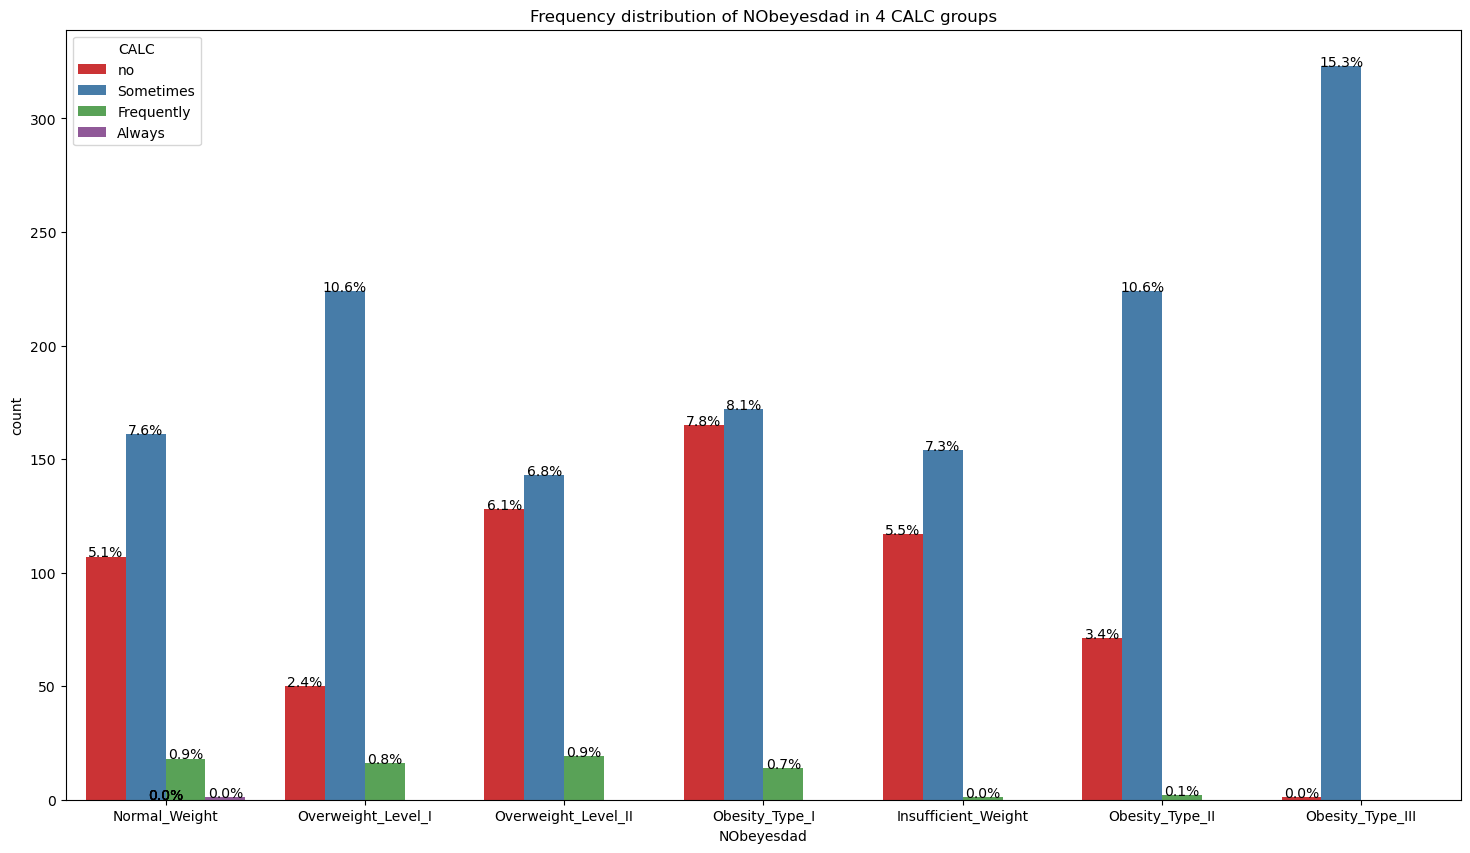

In [249]:
plt.figure(figsize=(18, 10))
total = float(len(df))
ax = sns.countplot(x='NObeyesdad', hue='CALC', data=df, palette='Set1')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Frequency distribution of NObeyesdad in 4 CALC groups')
plt.show()

Most people are not alcoholic. They can still get fat/obese.

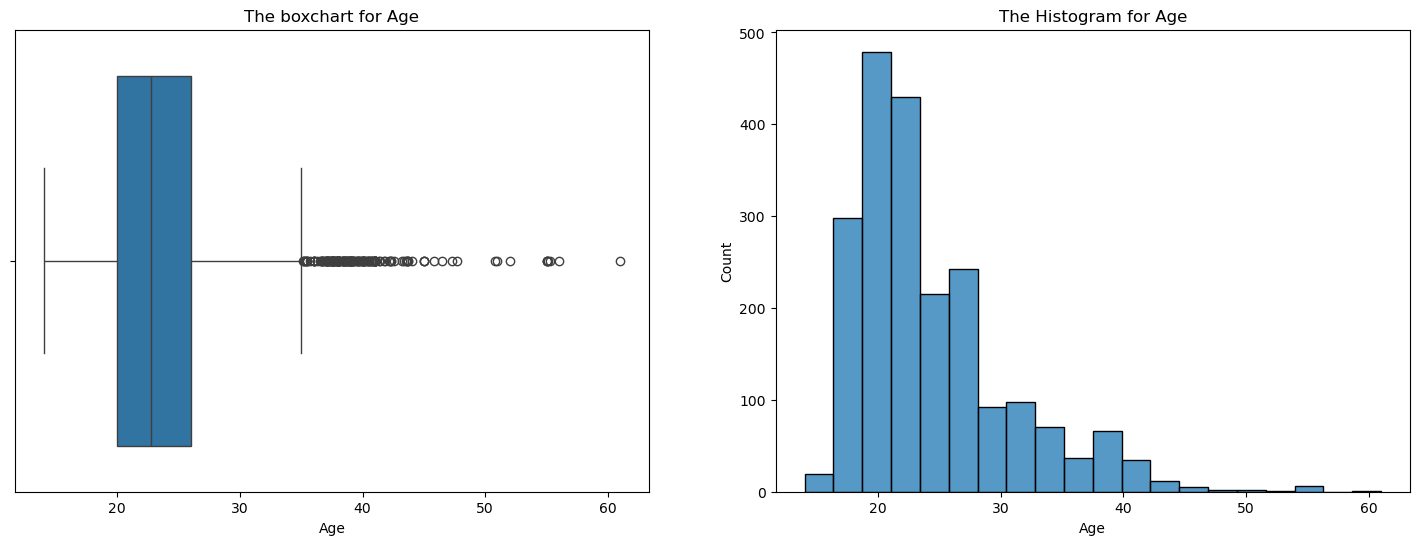

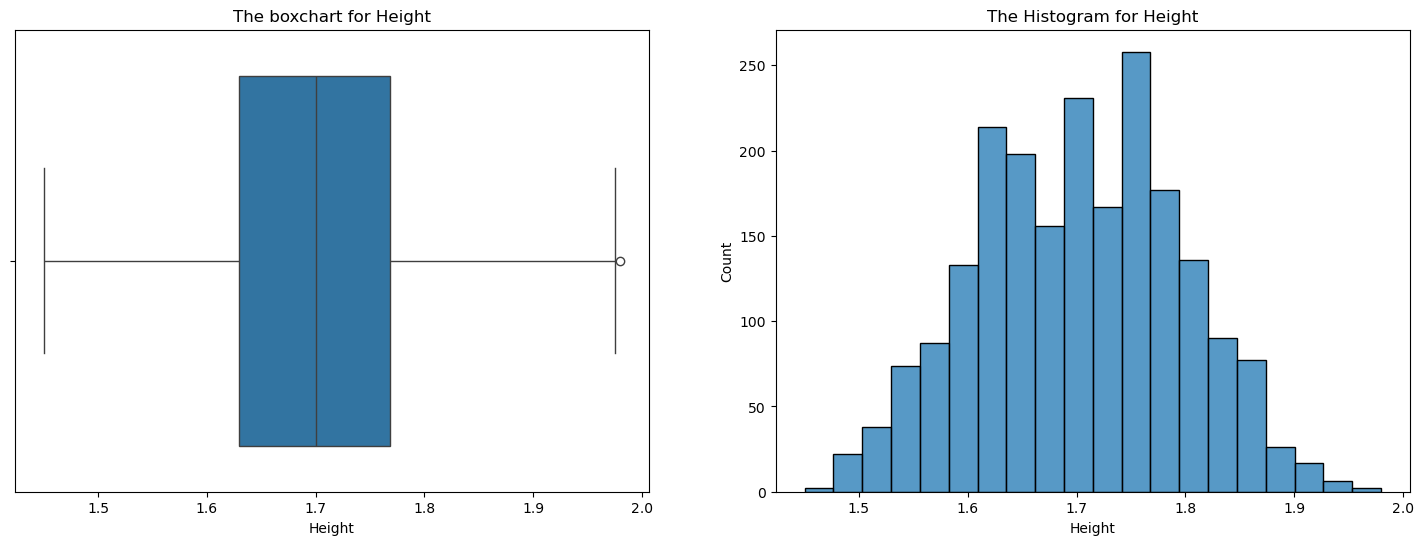

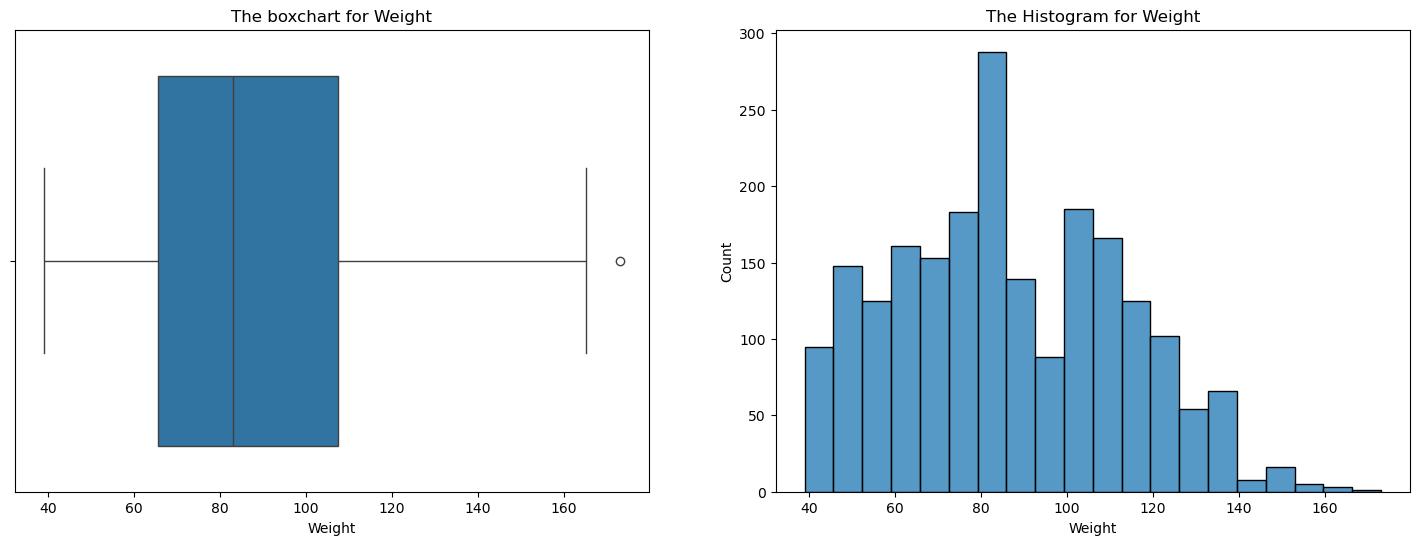

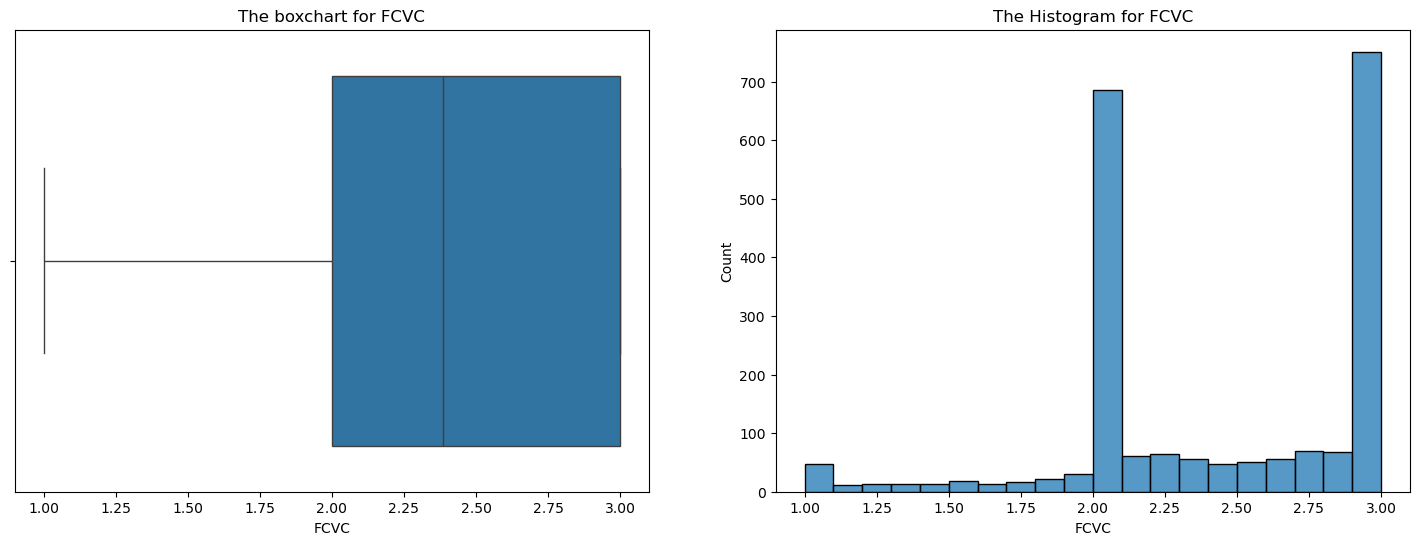

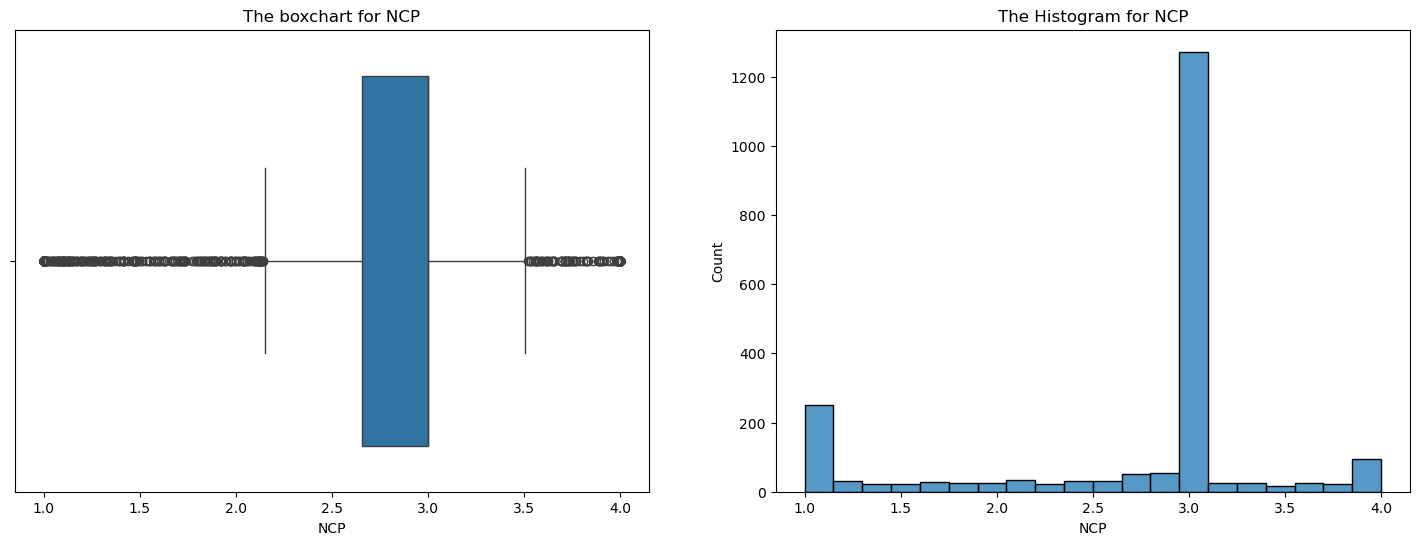

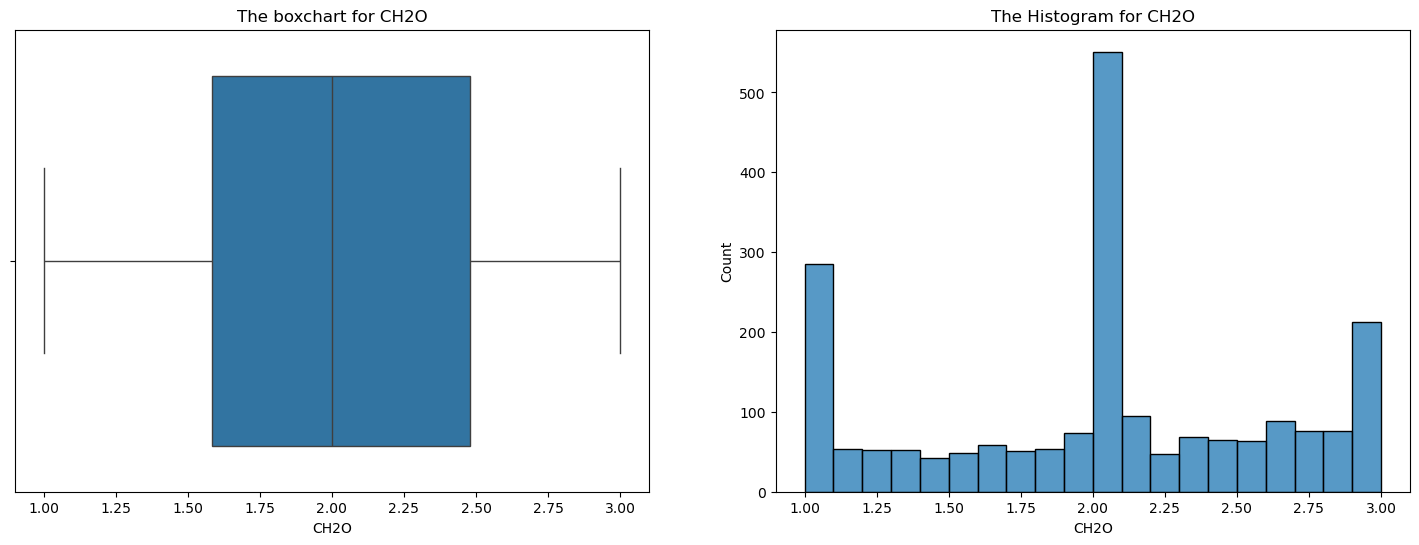

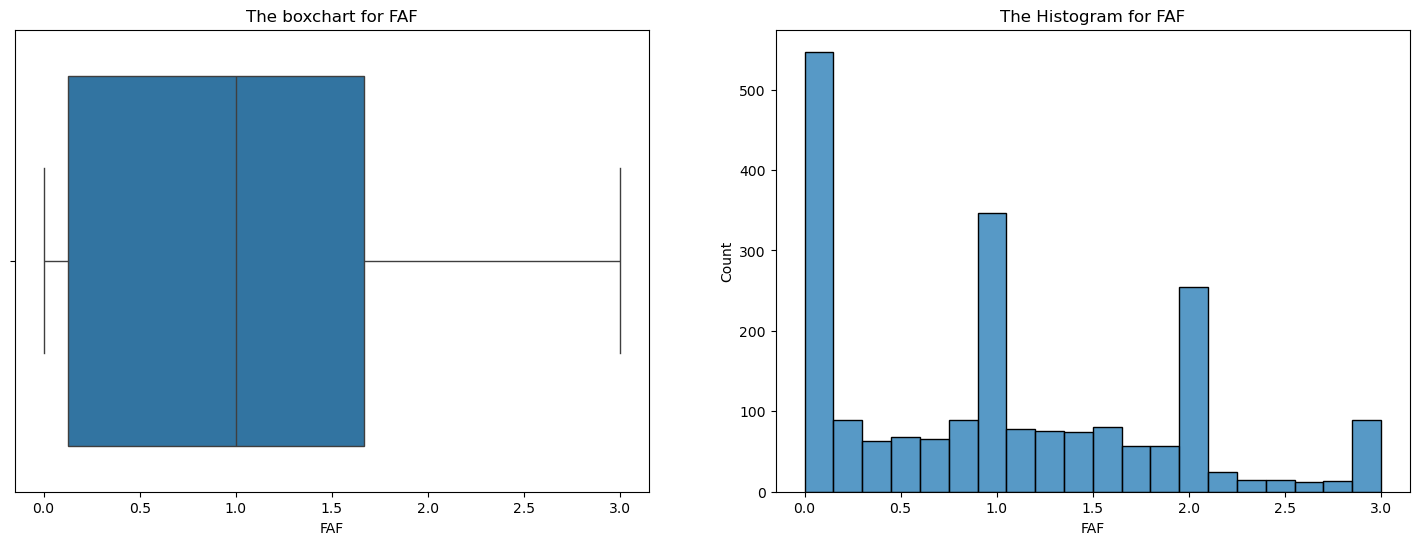

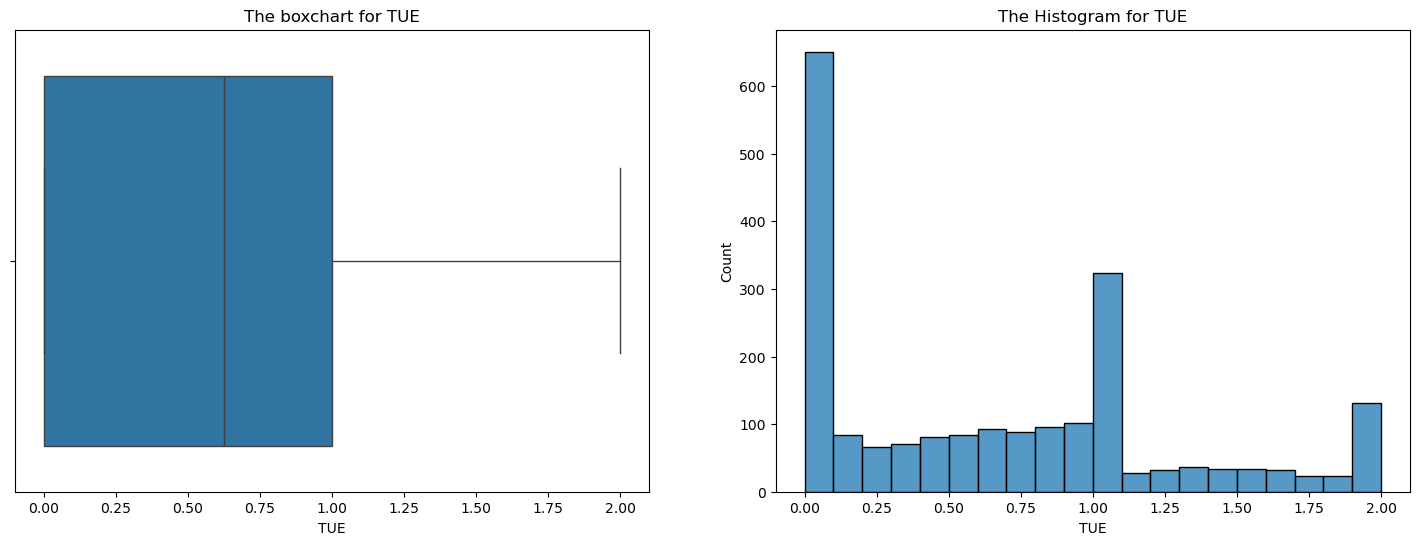

In [250]:
#Let's check for outliers in the numerical columns
for i in col_numerical:
    f, ax = plt.subplots(1, 2, figsize=(18, 6))
    ax[0] = sns.boxplot(x = df[i], data=df.iloc[1:], ax=ax[0])
    ax[0].set_title("The boxchart for {}".format(i))

    ax[1] = sns.histplot(x=df[i], bins=20)
    ax[1].set_title("The Histogram for {}".format(i))
    
    plt.show()

I don't feel we need to remove some outliers. They can be some monority in all human groups but still worth being analysed.  
Outliers could be some abnormalities(obesity).

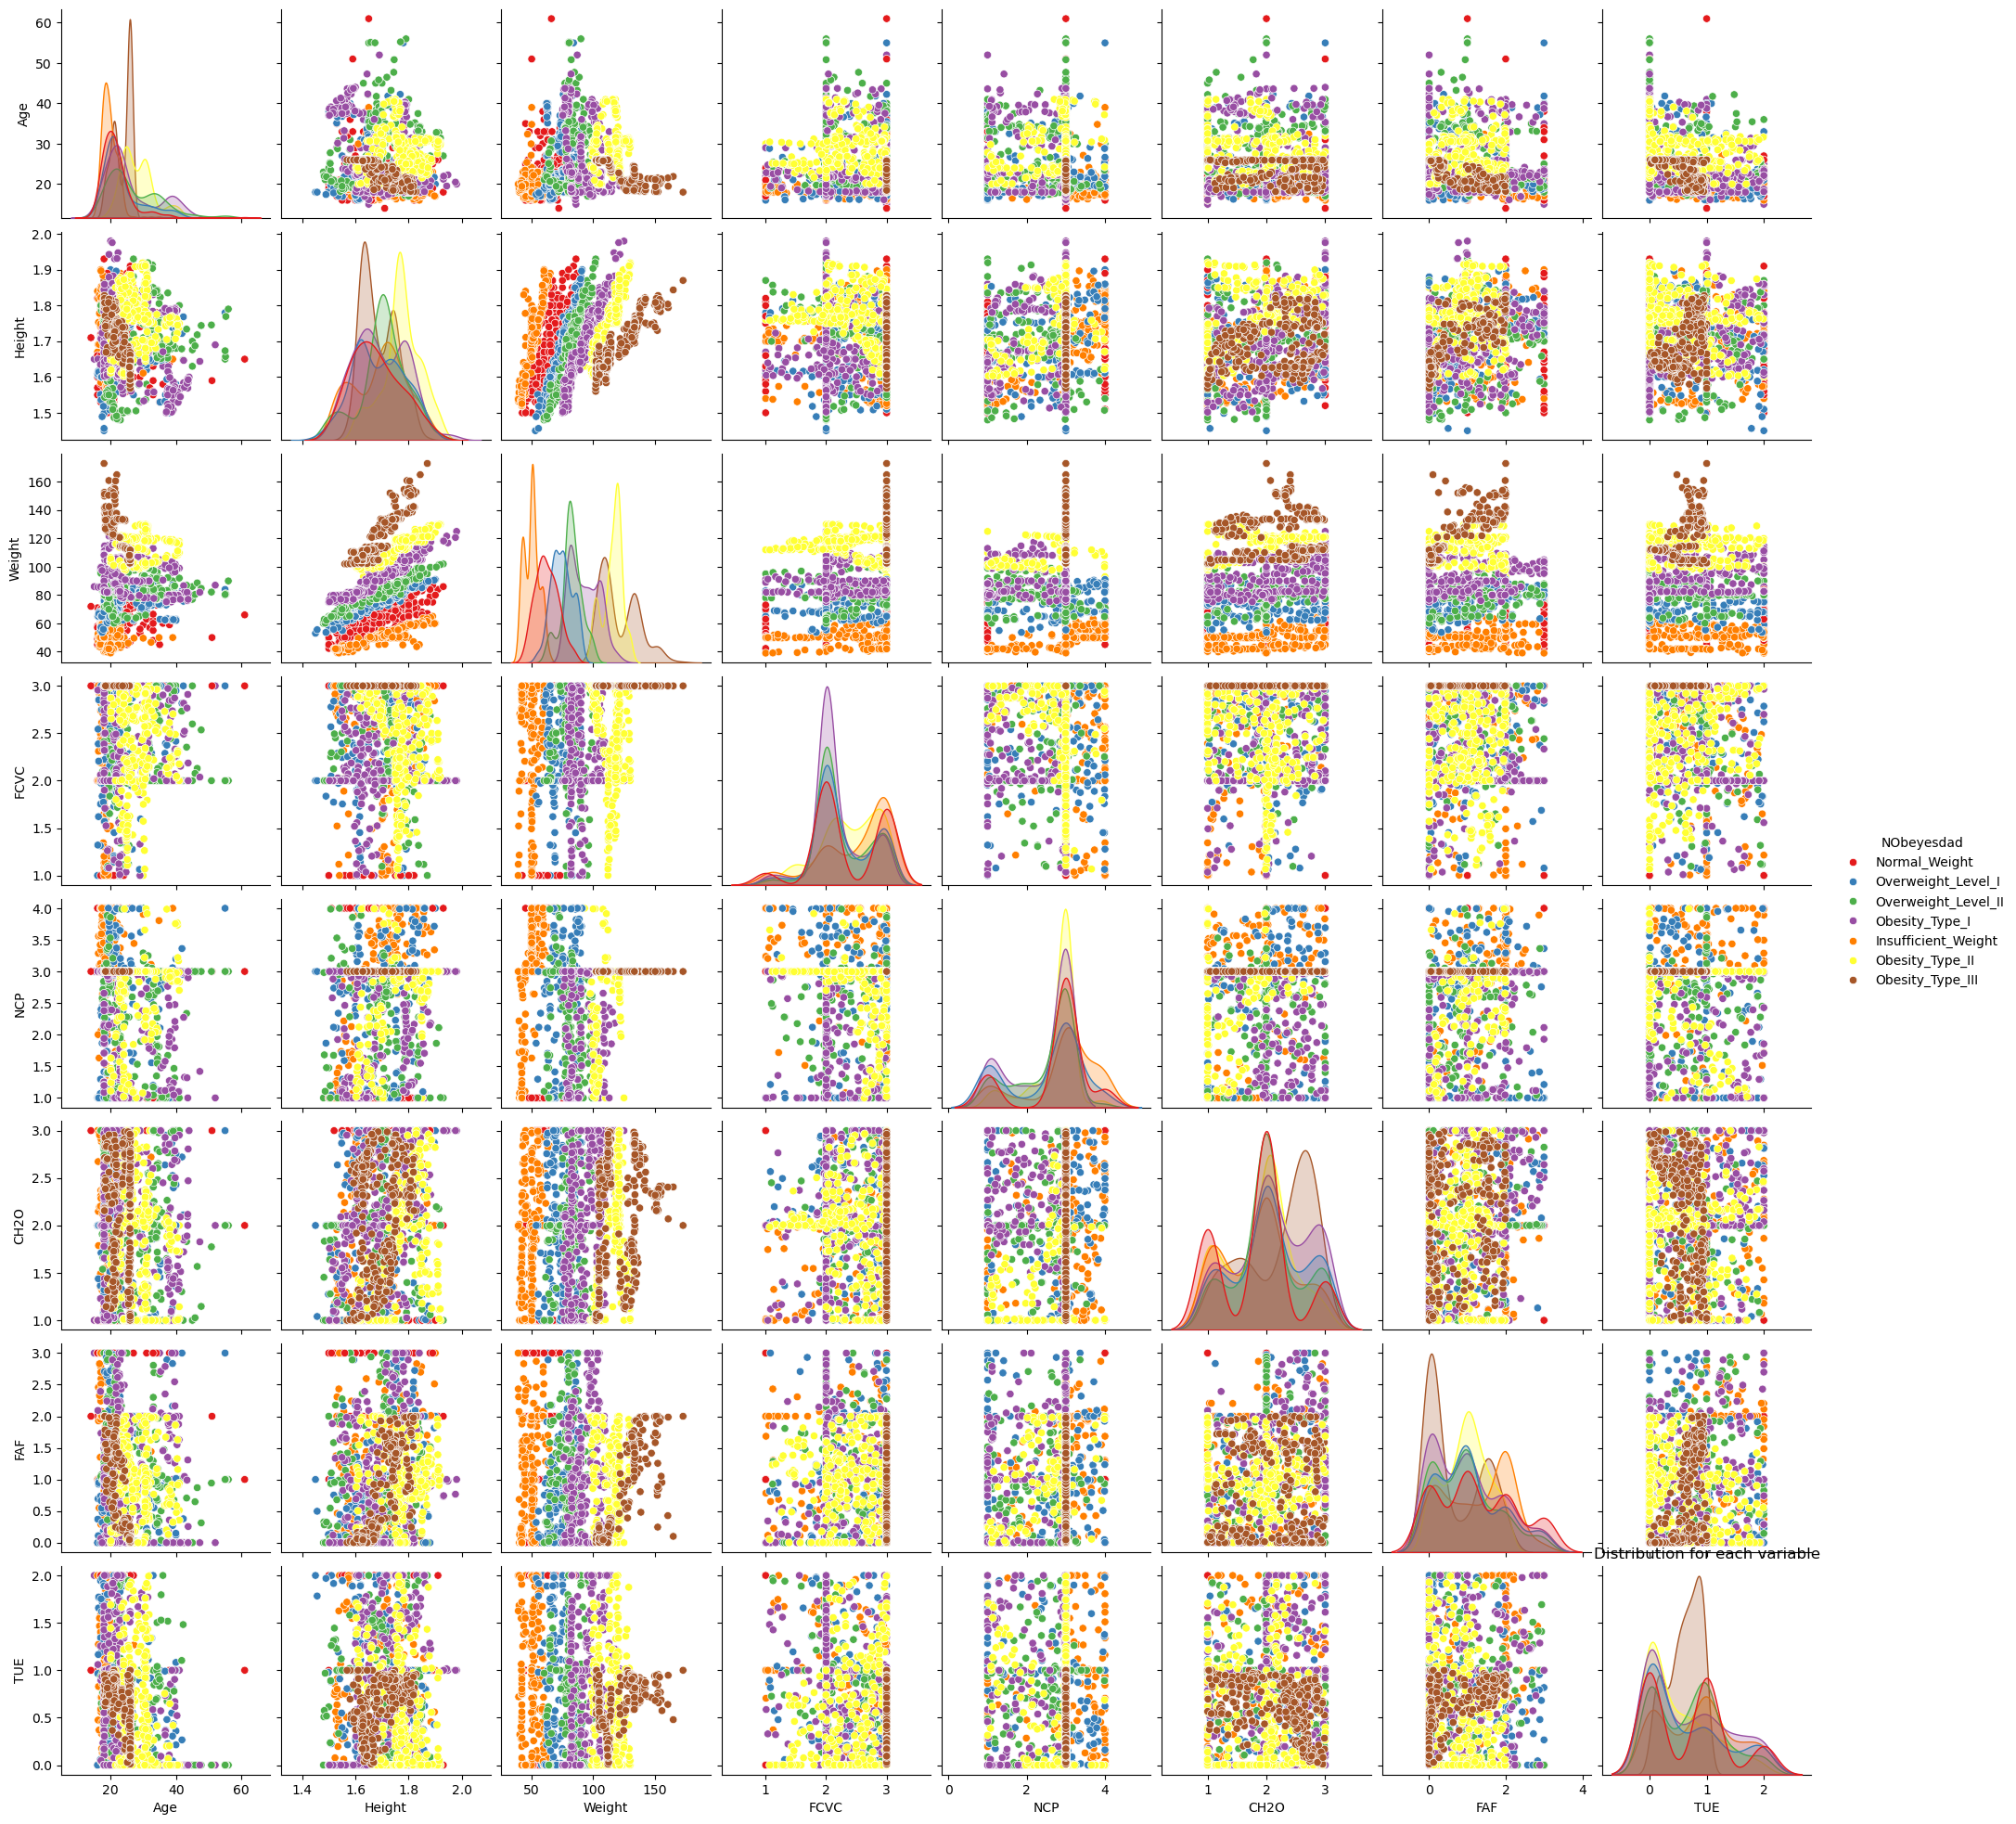

In [251]:
sns.pairplot(data= df, hue="NObeyesdad", palette='Set1')
plt.title('Distribution for each variable')
plt.show()

I guess these features that are more probably correlative with obesity: Age, Height, NCP, FCVC, FAF, TUE.  
I might be wrong.

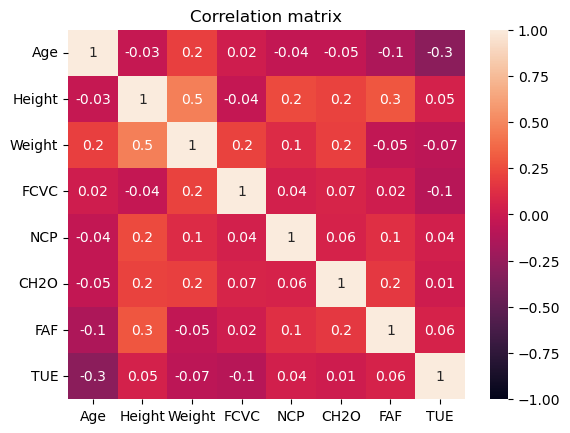

In [252]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')
plt.show()

This heatmap looks not complete. I need to convert categorical features into numerical values.

### 3. Organise the data for modelling

#### Label Encoding

In [253]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(l):
    le = LabelEncoder()
    df[l] = le.fit_transform(df[l])

In [254]:
col_catogorial

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [255]:
df.head(10)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC   
0  Female  21.0    1.62    64.0                            yes   no   2.0  \
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   
5    Male  29.0    1.62    53.0                             no  yes   2.0   
6  Female  23.0    1.50    55.0                            yes  yes   3.0   
7    Male  22.0    1.64    53.0                             no   no   2.0   
8    Male  24.0    1.78    64.0                            yes  yes   3.0   
9    Male  22.0    1.72    68.0                            yes  yes   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC   
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no  \
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
5  3.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
6  3.0  Sometimes    no   2.0   no  1.0  0.0   Sometimes   
7  3.0  Sometimes    no   2.0   no  3.0  0.0   Sometimes   
8  3.0  Sometimes    no   2.0   no  1.0  1.0  Frequently   
9  3.0  Sometimes    no   2.0   no  1.0  1.0          no   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II  
5             Automobile        Normal_Weight  
6              Motorbike        Normal_Weight  
7  Public_Transportation        Normal_Weight  
8  Public_Transportation        Normal_Weight  
9  Public_Transportation        Normal_Weight

In [256]:
for i in col_catogorial:
    label_encoder(i)

df.head(10)
# Converts seen be from Column CALC: no➡3 Sometimes➡2 Frequently➡1 

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC   
0       0  21.0    1.62    64.0                               1     0   2.0  \
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   
5       1  29.0    1.62    53.0                               0     1   2.0   
6       0  23.0    1.50    55.0                               1     1   3.0   
7       1  22.0    1.64    53.0                               0     0   2.0   
8       1  24.0    1.78    64.0                               1     1   3.0   
9       1  22.0    1.72    68.0                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  
5  3.0     2      0   2.0    0  0.0  0.0     2       0           1  
6  3.0     2      0   2.0    0  1.0  0.0     2       2           1  
7  3.0     2      0   2.0    0  3.0  0.0     2       3           1  
8  3.0     2      0   2.0    0  1.0  1.0     1       3           1  
9  3.0     2      0   2.0    0  1.0  1.0     3       3           1

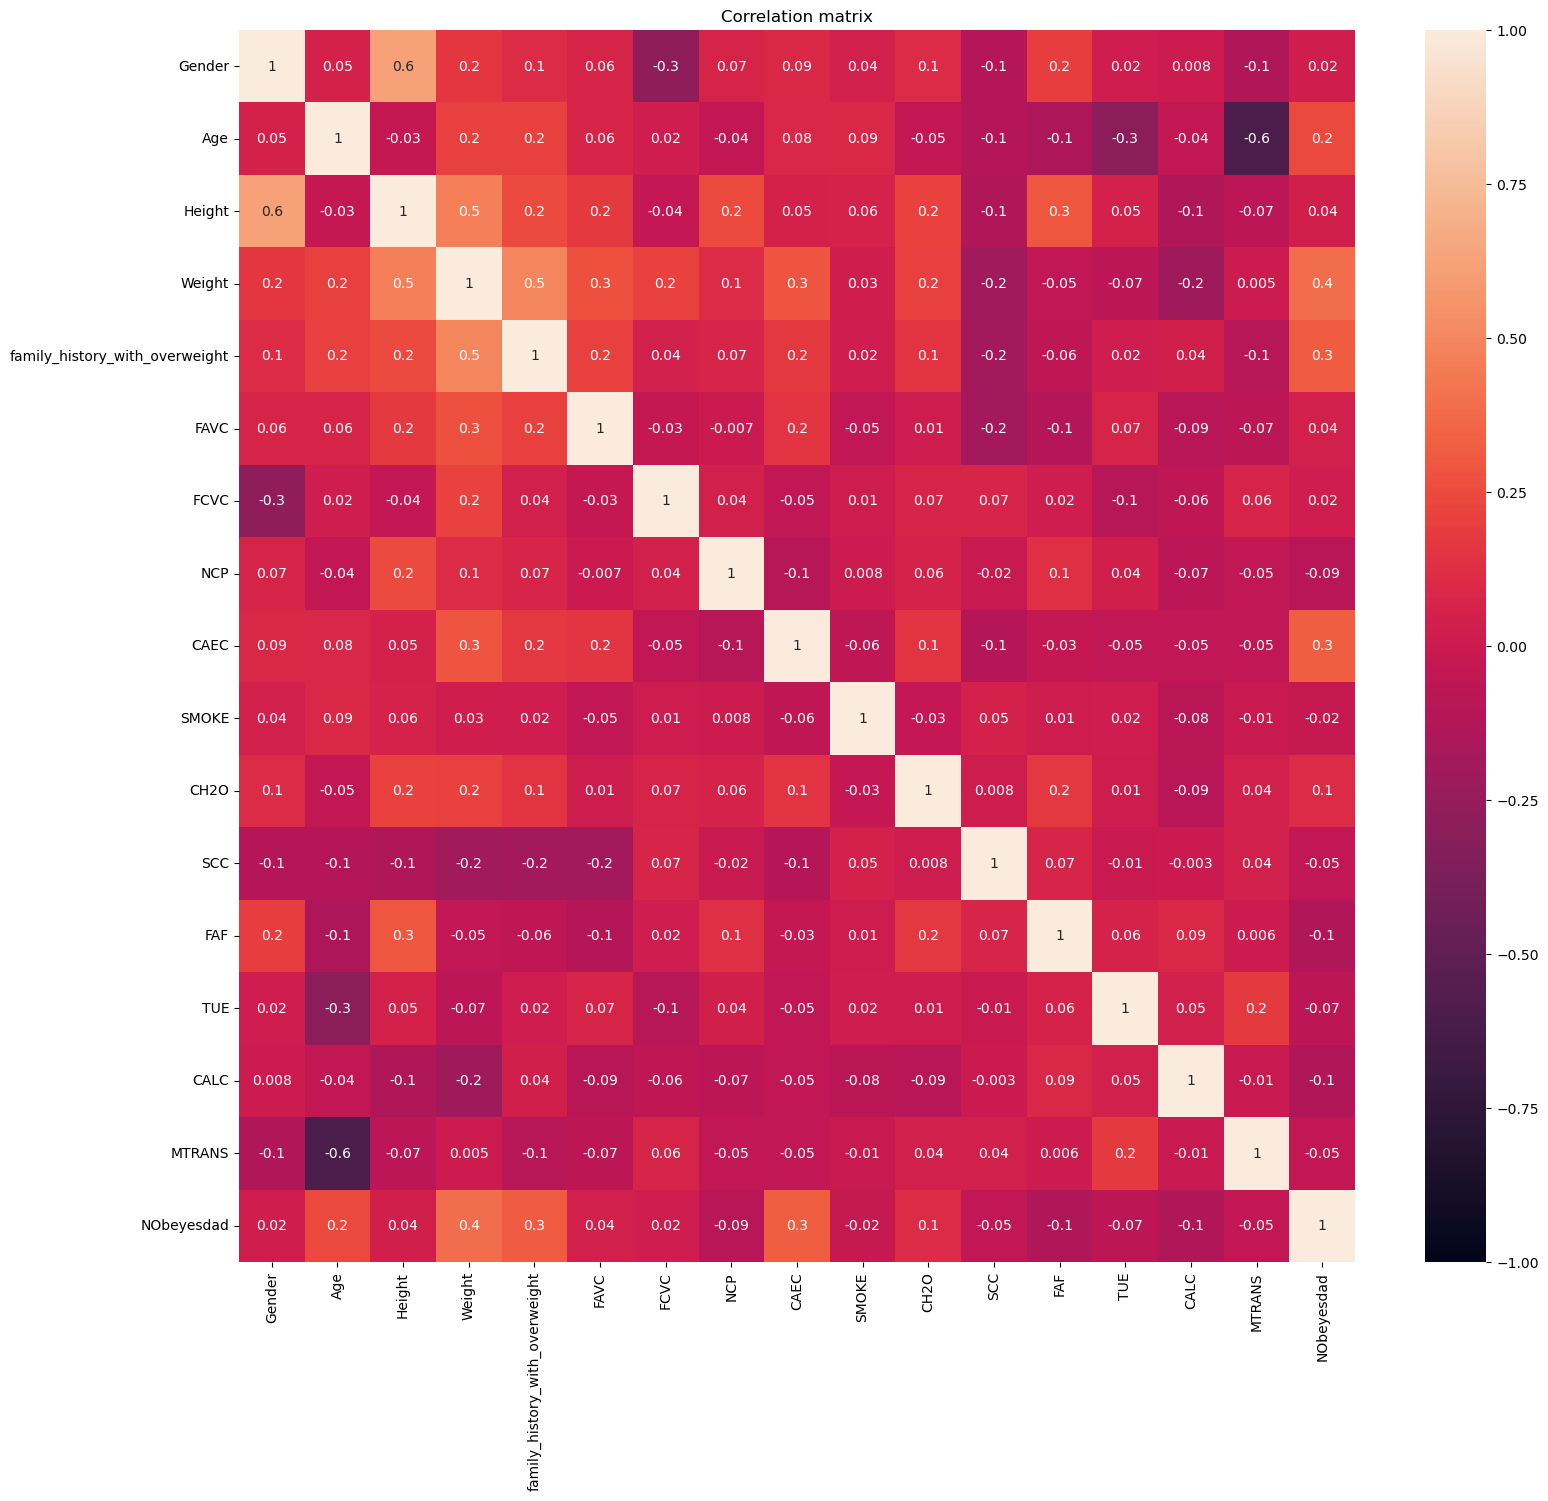

In [257]:
plt.figure(figsize=(18, 16))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')
plt.show()

We can see **Weight, family_history_with_overweight, CAEC** are relatively more correlated with **NObeyesdad**.  
Differerntly, **NCP, SCC, FAF, TUE, MTRANS** may have negative relations with Obesity.  
I don't feel **SMOKE, CALC** are good recommendations for losing weight, even though they show negative coefficients. These thing may ruin your body.

#### Normalizing the variables

In [258]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df.head(10)

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC   
0       0  21.0    1.62    64.0                               1     0   2.0  \
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   
5       1  29.0    1.62    53.0                               0     1   2.0   
6       0  23.0    1.50    55.0                               1     1   3.0   
7       1  22.0    1.64    53.0                               0     0   2.0   
8       1  24.0    1.78    64.0                               1     1   3.0   
9       1  22.0    1.72    68.0                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  
5  3.0     2      0   2.0    0  0.0  0.0     2       0           1  
6  3.0     2      0   2.0    0  1.0  0.0     2       2           1  
7  3.0     2      0   2.0    0  3.0  0.0     2       3           1  
8  3.0     2      0   2.0    0  1.0  1.0     1       3           1  
9  3.0     2      0   2.0    0  1.0  1.0     3       3           1

In [259]:
scaler.fit(df.drop('NObeyesdad', axis=1))
scaled_features = scaler.transform(df.drop('NObeyesdad', axis=1))
# scaled_features

In [260]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [261]:
# remove NObeyesdad
columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']

In [262]:
df_scaled = pd.DataFrame(scaled_features, columns=columns)
df_scaled.head(10)

Gender       Age    Height    Weight  family_history_with_overweight  FAVC   
0     0.0  0.148936  0.320755  0.186567                             1.0   0.0  \
1     0.0  0.148936  0.132075  0.126866                             1.0   0.0   
2     1.0  0.191489  0.660377  0.283582                             1.0   0.0   
3     1.0  0.276596  0.660377  0.358209                             0.0   0.0   
4     1.0  0.170213  0.622642  0.379104                             0.0   0.0   
5     1.0  0.319149  0.320755  0.104478                             0.0   1.0   
6     0.0  0.191489  0.094340  0.119403                             1.0   1.0   
7     1.0  0.170213  0.358491  0.104478                             0.0   0.0   
8     1.0  0.212766  0.622642  0.186567                             1.0   1.0   
9     1.0  0.170213  0.509434  0.216418                             1.0   1.0   

   FCVC       NCP      CAEC  SMOKE  CH2O  SCC       FAF  TUE      CALC  MTRANS  
0   0.5  0.666667  0.666667    0.0   0.5  0.0  0.000000  0.5  1.000000    0.75  
1   1.0  0.666667  0.666667    1.0   1.0  1.0  1.000000  0.0  0.666667    0.75  
2   0.5  0.666667  0.666667    0.0   0.5  0.0  0.666667  0.5  0.333333    0.75  
3   1.0  0.666667  0.666667    0.0   0.5  0.0  0.666667  0.0  0.333333    1.00  
4   0.5  0.000000  0.666667    0.0   0.5  0.0  0.000000  0.0  0.666667    0.75  
5   0.5  0.666667  0.666667    0.0   0.5  0.0  0.000000  0.0  0.666667    0.00  
6   1.0  0.666667  0.666667    0.0   0.5  0.0  0.333333  0.0  0.666667    0.50  
7   0.5  0.666667  0.666667    0.0   0.5  0.0  1.000000  0.0  0.666667    0.75  
8   1.0  0.666667  0.666667    0.0   0.5  0.0  0.333333  0.5  0.333333    0.75  
9   0.5  0.666667  0.666667    0.0   0.5  0.0  0.333333  0.5  1.000000    0.75

#### Handling imbalanced dataset

In [263]:
from imblearn.combine import SMOTETomek

In [264]:
X = df_scaled
y = df.NObeyesdad

In [265]:
# Implementing Oversampling for Handling Imbalanced
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X, y)
X_res.shape, y_res.shape

((2369, 16), (2369,))

In [266]:
from collections import Counter

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({2: 351, 4: 324, 3: 297, 5: 290, 6: 290, 1: 287, 0: 272})
Resampled dataset shape Counter({4: 350, 3: 349, 2: 342, 0: 339, 6: 336, 5: 328, 1: 325})


#### Train_test_split

In [267]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.30, random_state=101, shuffle=True
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1658, 16)
X_test shape: (711, 16)
y_train shape: (1658,)
y_test shape: (711,)


### 4. Implement prediction models

In [268]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

#### 4.1 Logistic Regression

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression(max_iter=5000)

#### 4.2 Naive Bayes

In [270]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

BNB = BernoulliNB()

In [271]:
GNB = GaussianNB()

#### 4.3 SVC

In [272]:
from sklearn.svm import SVC

svc = SVC(random_state = 101)

### 5. Train prediction models

#### 5.1 Logistic Regression

In [273]:
accuracies1 = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_model.fit(X_train, y_train)

print("Train score: ", np.mean(accuracies1))

Train score:  0.7310104466203181


#### 5.2 Naive Bayes

In [274]:
accuracies2 = cross_val_score(BNB, X_train, y_train, cv=5)
BNB.fit(X_train, y_train)

print("Train score:",np.mean(accuracies2))

Train score: 0.4746933352746333


In [275]:
accuracies3 = cross_val_score(GNB, X_train, y_train, cv=5)
GNB.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies3))

Train Score: 0.542843883085211


#### 5.3 SVC

In [276]:
accuracies4 = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train score:",np.mean(accuracies4))

Train score: 0.8250991882939613


### 6. Test prediction models and show results

#### 6.1 Logistic Regression

In [277]:
print("Test score:", lr_model.score(X_test, y_test))

result_dict_train["Logistic regression Default Train Score"] = np.mean(accuracies1)
result_dict_test["Logistic regression Default Test Score"] = lr_model.score(X_test,y_test)

Test score: 0.7215189873417721


#### 6.2 Naive Bayes

In [278]:
print("Test score:",BNB.score(X_test,y_test))

result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies2)
result_dict_test["Naive Bayes Default Test Score"] = BNB.score(X_test,y_test)

Test score: 0.4936708860759494


In [279]:
print("Test Score:",GNB.score(X_test,y_test))

result_dict_train["GaussianNB Train Score"] = np.mean(accuracies3)
result_dict_test["GaussianNB Test Score"] = GNB.score(X_test,y_test)

Test Score: 0.5611814345991561


#### 6.3 SVC

In [280]:
print("Test score:",svc.score(X_test,y_test))

result_dict_train["SVC Train Score"] = np.mean(accuracies4)
result_dict_test["SVC Test Score"] = svc.score(X_test,y_test)

Test score: 0.7932489451476793


### 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [281]:
for key, value in result_dict_train.items():
    print(f"{key}: {value}")

Logistic regression Default Train Score: 0.7310104466203181
Naive Bayes Default Train Score: 0.4746933352746333
GaussianNB Train Score: 0.542843883085211
SVC Train Score: 0.8250991882939613


In [282]:
for k, v in result_dict_test.items():
    print(f"{k}: {v}")

Logistic regression Default Test Score: 0.7215189873417721
Naive Bayes Default Test Score: 0.4936708860759494
GaussianNB Test Score: 0.5611814345991561
SVC Test Score: 0.7932489451476793


So, it looks like **SVC** is the model that was better than other 3 models after training.  
The test score also validated this conclusion.

### 8. Describe appropriate recommendations

**Family history with overweight** and **Consumption of food between meals (CAEC)** can make it more likely that you suffer from obesity.  
We can't change history, but we can take actions by reducing the consumption of snacks, afternoon tea/desserts.

**Number of main meals (NCP), Calories consumption monitoring (SCC), Physical activity frequency (FAF),  
Time using technology devices (TUE), Transportation used (MTRANS)** are good recommendations for fitness enthusiasts to consider.  
- Eat main meals seriously, rather than eating snacks or drinking sweet milk tea everyday.  
- Monitor your calory consumtions if you can, with the help of technology devices(e.g. Apple Watch).  
- Do enough exercises.
- Bicycle is good way of transportation, if you journey is not very far.

In **Obesity_Type_3**, which is the most serious group of obesity, female is the majority. They might need more care.

### 9. Reflect on what you have learned by completing this assignment

My biggest gain from completing this assignment is knowing how to preprocess tha raw data for following analyses and visualisation. Also, get some insight from graphs.  
Additionally, I get familiar with these powerful tools.  
If I want to do some reserach and dig some useful information in one specific field, I need to find accessible and reliable resouces of relevant data first.

### 10. References